# 서울시 구별 인구 현황

## 서울시 통계DB
- http://stat.seoul.go.kr/jsp3/index.jsp
- 서울에서 인구수가 많으면 고령비율도 높을까?

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [2]:
# population = pd.read_excel('data/Report_seoul_population_2018_3Q.xls', 
#                      header=2,
#                      parse_cols="B, C, D, M, N"
#                     )
# population.head()
population = pd.read_csv('data/seoul_population_cctv.csv', encoding='euc-kr')
population.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


In [3]:
population.tail()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
20,서대문구,1254,48.578199,138027,322497,310584,11913,50278,3.693988,15.590223,0.388841,174.517564
21,노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770
22,성동구,1327,81.780822,136831,317197,309251,7946,42581,2.505068,13.424150,0.418352,95.783977
23,성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425,0.367237,85.009416
24,금천구,1348,100.000000,106774,252359,232760,19599,35299,7.766317,13.987613,0.534160,4.641657


In [4]:
population['구'].unique()

array(['강남구', '양천구', '강서구', '용산구', '서초구', '송파구', '도봉구', '중랑구', '광진구',
       '강북구', '강동구', '마포구', '은평구', '관악구', '동대문구', '종로구', '구로구', '영등포구',
       '동작구', '중구', '서대문구', '노원구', '성동구', '성북구', '금천구'], dtype=object)

In [5]:
population

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750
5,송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414
6,도봉구,825,246.638655,137901,342990,340876,2114,55499,0.616344,16.180938,0.240532,625.687072
7,중랑구,916,79.960707,180044,409058,404313,4745,61271,1.159982,14.978560,0.223929,606.160018
8,광진구,878,53.228621,161714,369999,355032,14967,45202,4.045146,12.216790,0.237298,601.905647
9,강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102


In [6]:
plt.rcParams["figure.figsize"] = [12,6]

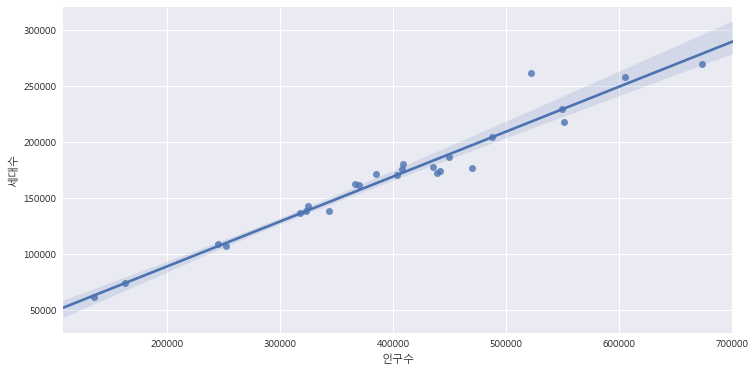

In [7]:
sns.regplot(x="인구수", y="세대수", data=population);

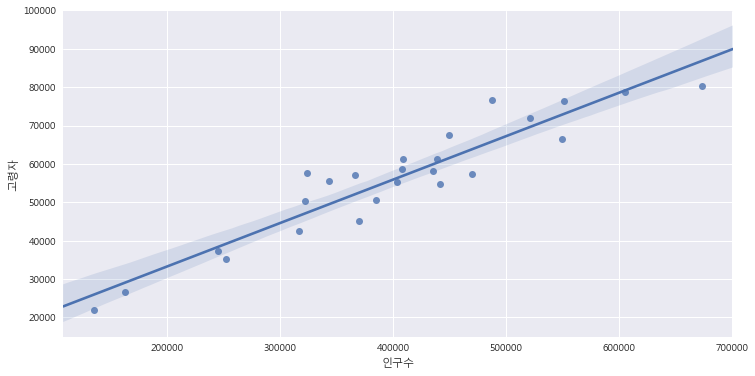

In [8]:
sns.regplot(x="인구수", y="고령자", data=population);

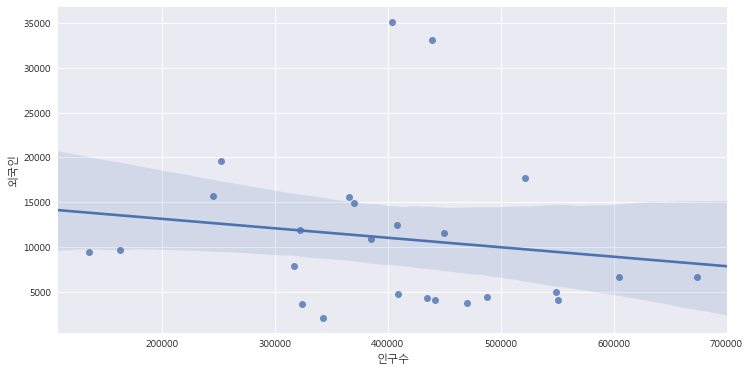

In [9]:
sns.regplot(x="인구수", y="외국인", data=population);

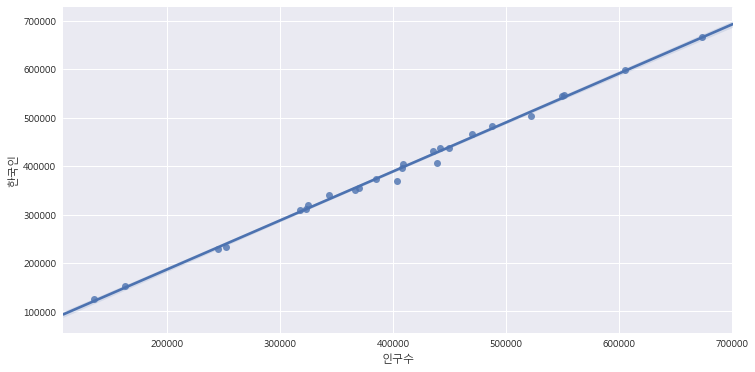

In [10]:
sns.regplot(x="인구수", y="한국인", data=population);

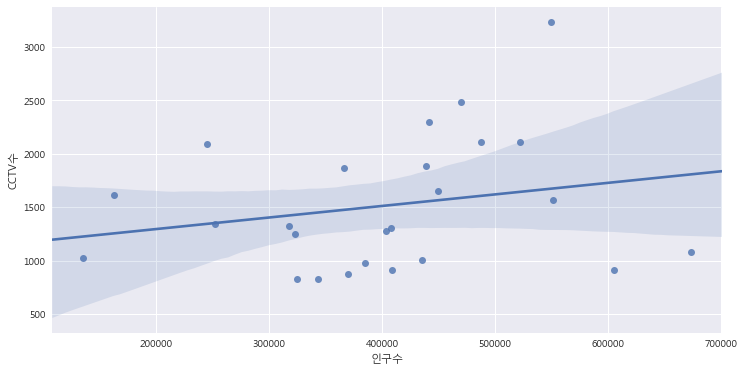

In [11]:
sns.regplot(x="인구수", y="CCTV수", data=population);

### 참조. https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/jso

In [12]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [18]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [19]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

,gu,counts
0,강남구,549255
1,양천구,469945
2,강서구,605068
3,용산구,245087
4,서초구,441539


In [20]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [21]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [22]:
map

In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [24]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [25]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['세대수']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [26]:
population.head()


,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


In [27]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [28]:
# population['고령화비율'] = population['65세이상고령자'] / population['인구수'] * 100
# population.head()

In [29]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령자비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [30]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['외국인']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [31]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['외국인비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [32]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['CCTV수']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [33]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['CCTV비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [34]:
population.sort_values(by='고령자', ascending=False).head(10)

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
5,송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
12,은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394,0.432101,500.603184
21,노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770
13,관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100
23,성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425,0.367237,85.009416
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
16,구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319
7,중랑구,916,79.960707,180044,409058,404313,4745,61271,1.159982,14.978560,0.223929,606.160018
18,동작구,1302,139.338235,175873,407925,395513,12412,58803,3.042716,14.415150,0.319176,218.934328


In [35]:
population.sort_values(by='인구수', ascending=False).head(10)

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
5,송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
21,노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
13,관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100
12,은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394,0.432101,500.603184
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
23,성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425,0.367237,85.009416
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750
16,구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319


In [36]:
population.sort_values(by='세대수', ascending=False).head(10)

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
5,송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414
13,관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
21,노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770
12,은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394,0.432101,500.603184
23,성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425,0.367237,85.009416
7,중랑구,916,79.960707,180044,409058,404313,4745,61271,1.159982,14.978560,0.223929,606.160018
10,강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889


In [37]:
population.sort_values(by='고령자비율', ascending=False).head(10)

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
9,강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102
15,종로구,1619,248.922414,73696,163086,153396,9690,26622,5.941650,16.323903,0.992728,362.934662
19,중구,1023,147.699758,61232,135258,125815,9443,21902,6.981472,16.192758,0.756332,202.960762
6,도봉구,825,246.638655,137901,342990,340876,2114,55499,0.616344,16.180938,0.240532,625.687072
12,은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394,0.432101,500.603184
14,동대문구,1870,74.766355,162232,366101,350556,15545,57096,4.246096,15.595696,0.510788,394.311244
20,서대문구,1254,48.578199,138027,322497,310584,11913,50278,3.693988,15.590223,0.388841,174.517564
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
23,성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425,0.367237,85.009416
7,중랑구,916,79.960707,180044,409058,404313,4745,61271,1.159982,14.978560,0.223929,606.160018


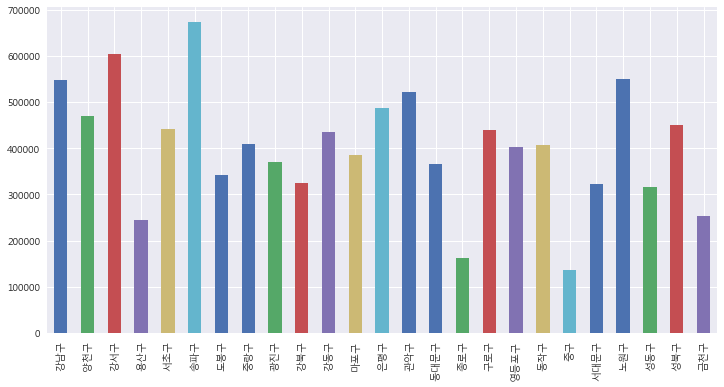

In [38]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='bar')

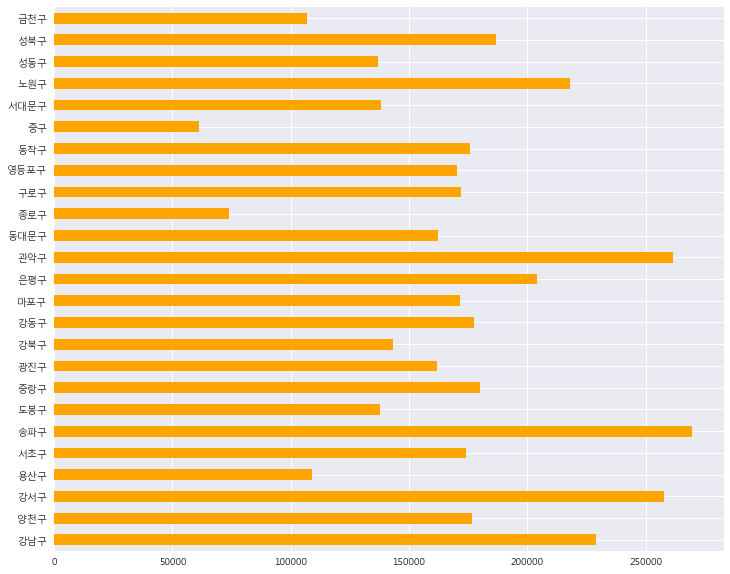

In [39]:
plt.rcParams["figure.figsize"] = [12,10]
df_population = pd.Series(population['세대수'].values, index=population['구'].values)
df_population.plot(kind='barh', color='orange')

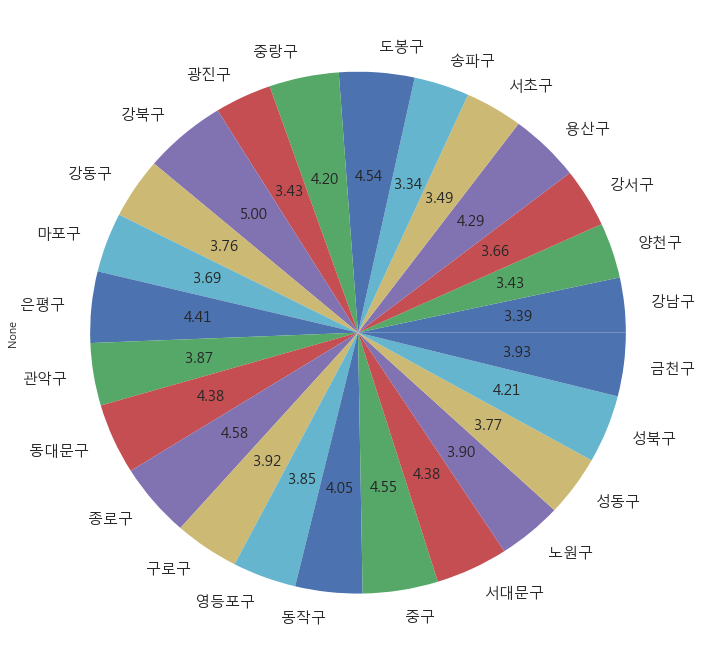

In [40]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령자비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15);

In [41]:
# population.to_csv('data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')